# Visualizing Data

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

## Simple Line Chart
To show trend(s).

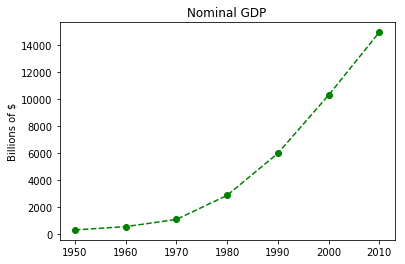

In [69]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

plt.plot(years, gdp, color='green', marker='o', linestyle='--')
plt.title("Nominal GDP")
plt.ylabel("Billions of $")
plt.savefig('images/viz_gdp.png')
plt.show();
#plt.gca().clear()

In [70]:
# clear the current figure so you can start fresh
plt.clf()

<Figure size 432x288 with 0 Axes>

## Line Charts

In [4]:
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]

In [5]:
total_error  = [x + y for x, y in zip(variance, bias_squared)]
total_error

[257, 130, 68, 40, 32, 40, 68, 130, 257]

In [6]:
# enumerate() puts variables into pairs
xs = [i for i in enumerate(variance)]
xs

[(0, 1), (1, 2), (2, 4), (3, 8), (4, 16), (5, 32), (6, 64), (7, 128), (8, 256)]

In [7]:
xs = [i for i, _ in enumerate(variance)]
xs

[0, 1, 2, 3, 4, 5, 6, 7, 8]

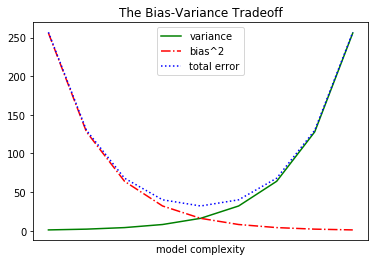

In [8]:
# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.savefig('images/viz_line_chart.png')
plt.show();

## Bar Chart
To show some quantity varies among some discrete set of items. 

In [9]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

In [10]:
r = range(len(movies))
r

range(0, 5)

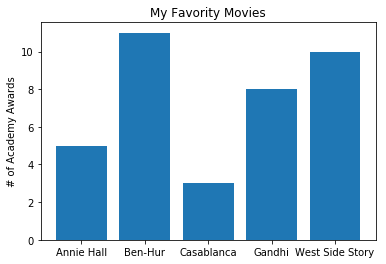

In [11]:
plt.bar(r, num_oscars)
plt.title("My Favority Movies")
plt.ylabel("# of Academy Awards")
plt.xticks(r, movies)
plt.savefig('images/viz_movies.png')
plt.show();

## Bar Chart
To plot histograms of bucketed numeric values, to visually explore how the values are distributed.

In [12]:
from collections import Counter

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

In [13]:
# The real floor division operator is “//”. 
# It returns floor value for both integer and floating point arguments.
100 // 10 * 10

100

In [14]:
min(grades[0] // 10 * 10, 90)

80

In [15]:
[min(grade // 10 * 10, 90) for grade in grades]

[80, 90, 90, 80, 70, 0, 80, 80, 90, 60, 70, 70, 0]

In [16]:
# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)
histogram

Counter({80: 4, 90: 3, 70: 3, 0: 2, 60: 1})

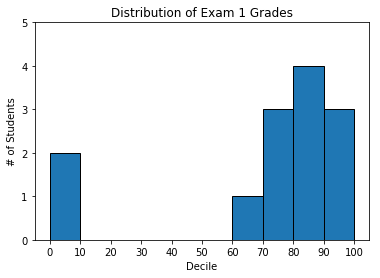

In [17]:
plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                 # Give each bar a width of 10
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.savefig('images/viz_grades.png')
plt.show();

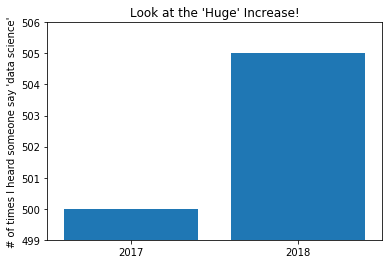

In [18]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the 'Huge' Increase!")
plt.savefig('images/viz_misleading_y_axis.png')
plt.show();

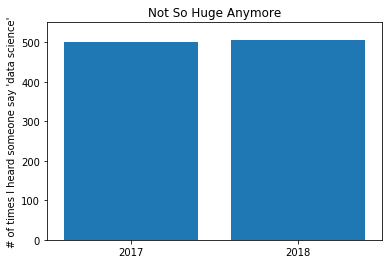

In [19]:
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
plt.ticklabel_format(useOffset=False)

plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not So Huge Anymore")
plt.savefig('images/viz_non_misleading_y_axis.png')
plt.show();

## Histograms

To visually explore how the values are distributed (see also Bar Charts above)

In [51]:
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

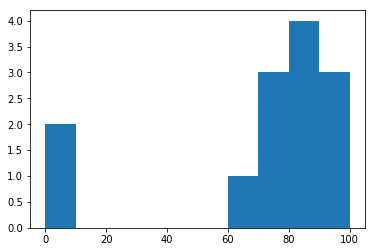

In [64]:
# Divide data into 10 bins (default)
plt.hist(grades)
plt.savefig('images/viz_grades_histogram.png')
plt.show();

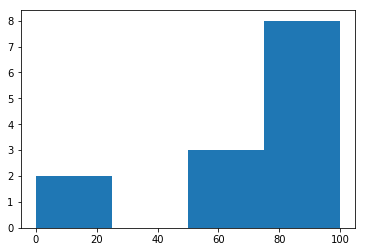

In [66]:
# Divide data into 4 bins
# Too few bins will oversimplify realiuty and won't show you the details.
# Too many bins will overcomplicate reality and won't show the bigger picture.
plt.hist(grades, bins=4)
plt.savefig('images/viz_grades_histogram_bins.png')
plt.show();

## Pyramids

see: https://github.com/afolaborn/Python_Jupyter_Notebook/blob/master/Population-Pyramid/Population_Pyramid_Final.ipynb

## Scatterplots
To visualize the relationship between two paired sets of data.

In [20]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

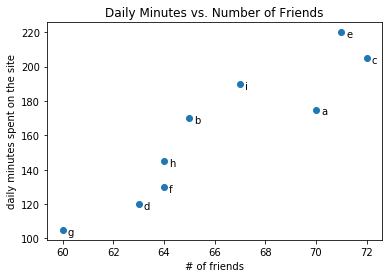

In [21]:
plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
        xy=(friend_count, minute_count), # Put the label with its point
        xytext=(5, -5),                  # but slightly offset
        textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.savefig('images/viz_scatterplot.png')
plt.show();

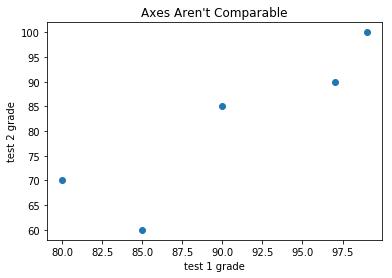

In [22]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.savefig('images/viz_scatterplot_axes_not_comparable.png')
plt.show();

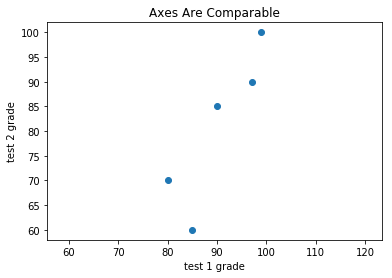

In [23]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Are Comparable")
plt.axis("equal")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.savefig('images/viz_scatterplot_axes_comparable.png')
plt.show();

Logaritmic scale example

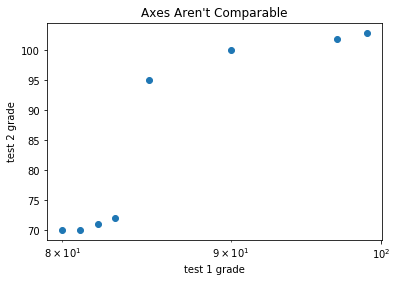

In [49]:
test_1_grades = [ 99, 90, 85, 97, 80, 81, 82, 83]
test_2_grades = [103, 100, 95, 102, 70, 70, 71, 72]

plt.scatter(test_1_grades, test_2_grades)
plt.xscale('log')
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.savefig('images/viz_scatterplot_logaritmic_scale.png')
plt.show();

Dots sizes

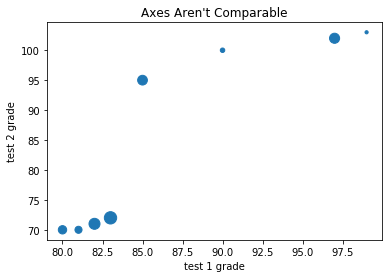

In [74]:
import numpy as np

test_1_grades = [ 99, 90, 85, 97, 80, 81, 82, 83]
test_2_grades = [103, 100, 95, 102, 70, 70, 71, 72]

sizes = [10, 20, 95, 102, 70, 50, 121, 152]

np_test_1_grades = np.array(test_1_grades)
np_test_2_grades = np.array(test_2_grades)

np_sizes = np_test_1_grades + np_test_2_grades + sizes

plt.scatter(test_1_grades, test_2_grades, s=sizes)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.savefig('images/viz_scatterplot_dots_sizes.png')
plt.show();

In [93]:
#colors = [str(item/255.) for item in test_1_grades]
colors = sizes

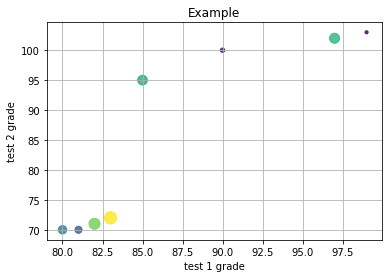

In [95]:
# Scatter plot
plt.scatter(x = test_1_grades, y = test_2_grades, s = sizes, c = colors, alpha = 0.8)

#plt.xscale('log') 
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.title('Example')
#plt.xticks([1000,10000,100000], ['1k','10k','100k'])

# Additional customizations
#plt.text(99, 71, 'Text Label 1')
#plt.text(80, 80, 'Text Label 2')

# Add grid() call
plt.grid(True)

plt.savefig('images/viz_scatterplot_dots_sizes_colors.png')
plt.show()